In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('max_columns',None)
sns.set(style="white", color_codes=True)
plt.rcParams['figure.figsize'] = (9,9)
%matplotlib inline

In [10]:
st_loans = pd.read_csv(filepath_or_buffer="data_consumer_loan/loan.csv",squeeze=True, parse_dates=True)

In [11]:
st_loans.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [21]:
## Select the ones you want
st_only = st_loans[['loan_amnt', 'int_rate', 'annual_inc', 'longest_credit_length']].dropna()
st_only.head()

,loan_amnt,int_rate,annual_inc,longest_credit_length
0,5000,10.65,24000.0,26.0
1,2500,15.27,30000.0,12.0
2,2400,15.96,12252.0,10.0
3,10000,13.49,49200.0,15.0
4,5000,7.90,36000.0,7.0


#### Annual income

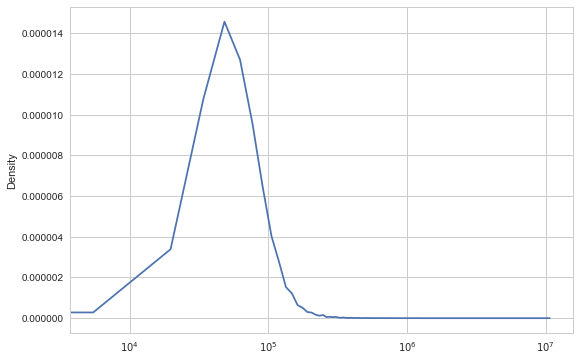

In [33]:
plt.rcParams['figure.figsize'] = (9,6)
st_only["annual_inc"].plot.density(logx = True)

#### Loan Amount

F:\CreativeSoftware\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


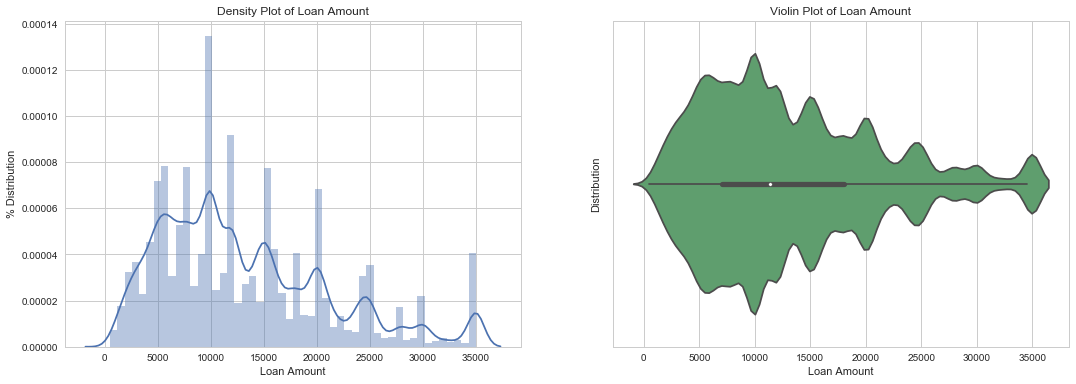

In [28]:
plt.rcParams['figure.figsize'] = (9,9)
sns.set_style("whitegrid")
fig, axs = plt.subplots(1,2,figsize=(18,6))

sns.distplot(st_only.loan_amnt, ax=axs[0])
axs[0].set(xlabel='Loan Amount', ylabel='% Distribution',title='Density Plot of Loan Amount')

sns.violinplot(st_only.loan_amnt,color="g", ax=axs[1])
axs[1].set(xlabel='Loan Amount', ylabel='Distribution',title='Violin Plot of Loan Amount')

plt.legend()
plt.show()

#### Loan Purpose

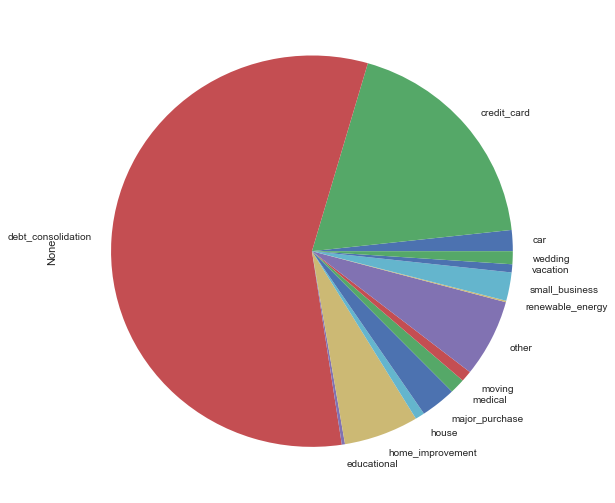

In [34]:
plt.rcParams['figure.figsize'] = (9,9)
st_loans.groupby('purpose').size().plot(kind='pie')

In [42]:
import nltk
import collections as co
l = []
st_loans['purpose'].apply(lambda x: l.append(x))
text = str(l)

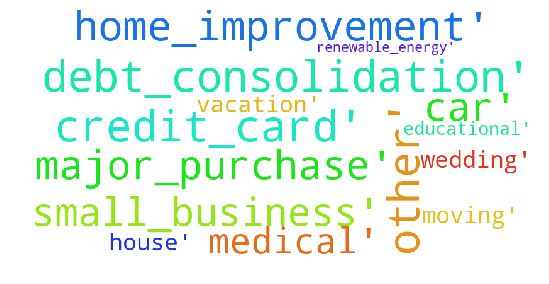

In [43]:
plt.rcParams['figure.figsize'] = (9,6)
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', max_words=120, width=800, height=400).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Loan Interest Rate

F:\CreativeSoftware\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


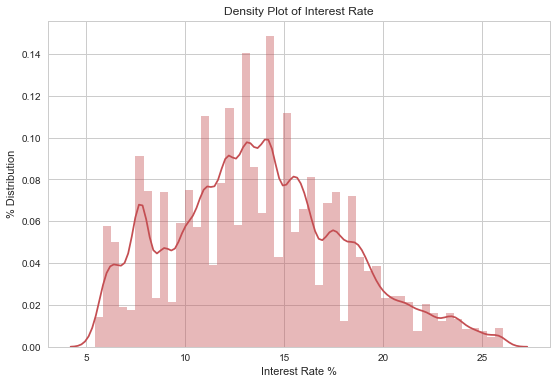

In [44]:
plt.rcParams['figure.figsize'] = (9,6)
ax=sns.distplot(st_only.int_rate, color="r")
ax.set(xlabel='Interest Rate %', 
       ylabel='% Distribution',title='Density Plot of Interest Rate')

plt.legend();

#### Interest Rate by Loan Amount

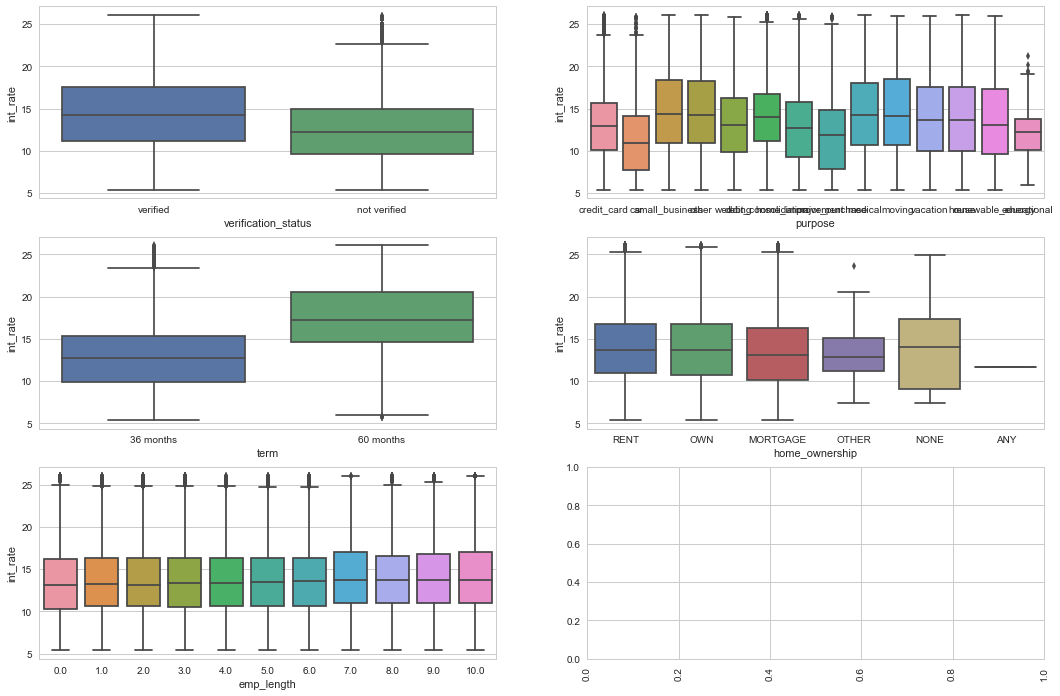

In [53]:
fig, axes = plt.subplots(3, 2, figsize=(18,12))

sns.boxplot(x='verification_status', y='int_rate', data=st_loans, ax=axes[0, 0])
plt.xticks(rotation=90)
sns.boxplot(x='purpose', y='int_rate', data=st_loans, ax=axes[0,1])
plt.xticks(rotation=90)
sns.boxplot(x='term', y='int_rate', data=st_loans, ax=axes[1,0])
plt.xticks(rotation=90)
sns.boxplot(x='home_ownership', y='int_rate', data=st_loans, ax=axes[1,1])
plt.xticks(rotation=90)
sns.boxplot(x='emp_length', y='int_rate', data=st_loans, ax=axes[2,0])
plt.xticks(rotation=90)

plt.show()

#### Bad Debt by Purpose

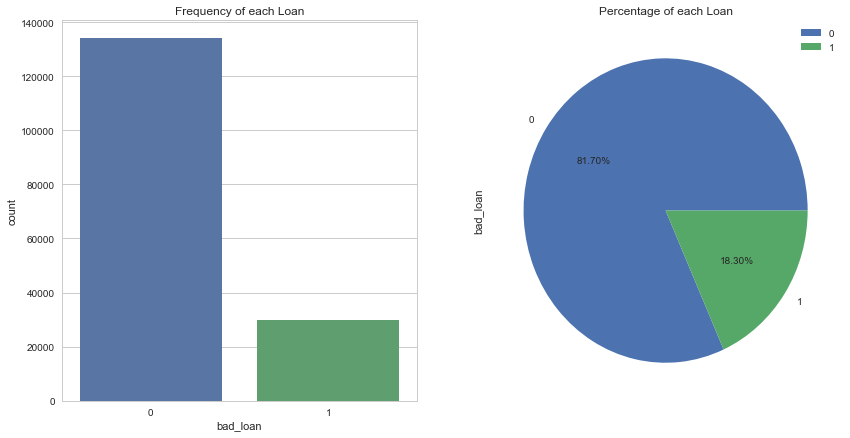

In [79]:
# Among 10 kinds of purposes, we only cares about '0' and '1'
df_sub = st_loans[(st_loans["bad_loan"] == 0) |(st_loans["bad_loan"] == 1)]
filtered_loans = df_sub
fig, axs = plt.subplots(1,2,figsize=(14,7))

sns.countplot(x='bad_loan',data=filtered_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan")

filtered_loans.bad_loan.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan")

plt.legend();

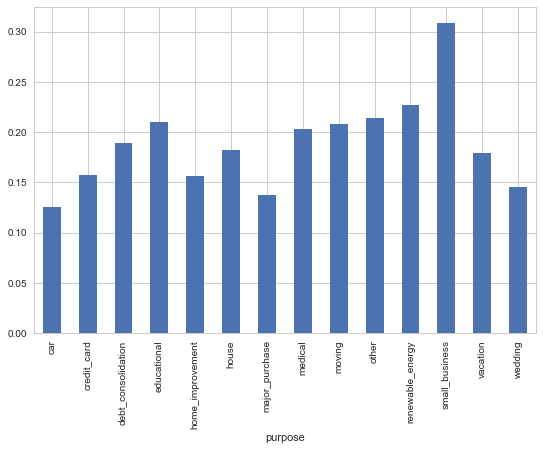

In [80]:
plt.rcParams['figure.figsize'] = (9,6)
purpose_= pd.pivot_table(filtered_loans, index = 'purpose',values = 'bad_loan', aggfunc=[np.sum,len,np.mean])
plt.show(purpose_['mean'].plot(kind = 'bar')) 